In [1]:
import torch
import torch.nn as nn
from torch.nn import functional as F

# D2L
D2l is an interactive online book, with lots of info on nitty gritty of pytorch , tensorflow etc. Find it here: http://d2l.ai/

In [2]:
class Inception(nn.Module):
    def __init__(self, in_channels, c1,c2,c3,c4,debug=False,**kwargs):
        super(Inception, self).__init__(**kwargs)
        self.p1_1 = nn.Conv2d(in_channels, c1, kernel_size=1)
        self.p2_1 = nn.Conv2d(in_channels, c2[0], kernel_size=1)
        self.p2_2 = nn.Conv2d(c2[0], c2[1], kernel_size=3, padding=1)
        
        self.p3_1 = nn.Conv2d(in_channels, c3[0], kernel_size=1)
        self.p3_2 = nn.Conv2d(c3[0], c3[1], kernel_size=5, padding=2)
        
        self.p4_1 = nn.MaxPool2d(kernel_size=3, stride=1, padding=1)
        self.p4_2 = nn.Conv2d(in_channels, c4, kernel_size=1)
        
        self.debug = debug
        
    def forward(self, X):
        if(self.debug):
            p1 = self.p1_1(X)
            print("p1_Conv: ", p1.shape)
            p1 = F.relu(p1)
            print("p1_relu:", p1.shape)
            
            p2 = self.p2_1(X)
            print("p2_Conv:", p2.shape)
            p2 = F.relu(p2)
            print("p2_relu:", p2.shape)
            p2 = self.p2_2(p2)
            print("p2_Conv2:", p2.shape)
            p2 = F.relu(p2)
            print("p2_relu:", p2.shape)
            
            p3 = self.p3_1(X)
            print("p3_Conv:", p3.shape)
            p3 = F.relu(p3)
            print("p3 relu:", p3.shape)
            p3 = self.p3_2(p3)
            print("p3_Conv2:", p3.shape)
            p3 = F.relu(p3)
            print("p3_relu:", p3.shape)
            
            p4 = self.p4_1(X)
            print("p4_Maxpool:", p4.shape)
            p4 = self.p4_2(p4)
            print("p4_Conv:", p4.shape)
            p4 = F.relu(p4)
            print("p4_relu:", p4.shape)
        
        else:
            p1 = F.relu(self.p1_1(X))
            p2 = F.relu(self.p2_2(F.relu(self.p2_1(X))))
            p3 = F.relu(self.p3_2(F.relu(self.p3_1(X))))
            p4 = F.relu(self.p4_2(self.p4_1(X)))
        
        return torch.cat((p1,p2,p3,p4), dim=1)
        

In [3]:
X = torch.randn(1,1,28,28)

def look_in_net(net, X):
    out = X
    
    for layer in net:
        out = layer(out)
        print(f"For output layer {out.__class__.__name__} : {out.shape}")



In [4]:
net = Inception(1, 32, (32,64), (64,32),32,debug=True)

In [5]:
net(X).shape

p1_Conv:  torch.Size([1, 32, 28, 28])
p1_relu: torch.Size([1, 32, 28, 28])
p2_Conv: torch.Size([1, 32, 28, 28])
p2_relu: torch.Size([1, 32, 28, 28])
p2_Conv2: torch.Size([1, 64, 28, 28])
p2_relu: torch.Size([1, 64, 28, 28])
p3_Conv: torch.Size([1, 64, 28, 28])
p3 relu: torch.Size([1, 64, 28, 28])
p3_Conv2: torch.Size([1, 32, 28, 28])
p3_relu: torch.Size([1, 32, 28, 28])
p4_Maxpool: torch.Size([1, 1, 28, 28])
p4_Conv: torch.Size([1, 32, 28, 28])
p4_relu: torch.Size([1, 32, 28, 28])


torch.Size([1, 160, 28, 28])

In [6]:
p1 = torch.randn(1,2)
p2 = torch.randn(1,2)
p3 = torch.randn(1,2)
p4 = torch.randn(1,2)

torch.cat((p1,p2,p3,p4), dim=0)

tensor([[ 6.9859e-01,  1.2181e+00],
        [ 3.2102e-04, -1.3306e-01],
        [-3.0904e-01, -1.8024e-01],
        [-7.8951e-01,  1.7663e+00]])

In [7]:
torch.cat((p1,p2,p3,p4), dim=1)

tensor([[ 6.9859e-01,  1.2181e+00,  3.2102e-04, -1.3306e-01, -3.0904e-01,
         -1.8024e-01, -7.8951e-01,  1.7663e+00]])

In [8]:
b1 = nn.Sequential(nn.Conv2d(1, 64, kernel_size=7, stride=2, padding=3),
                   nn.ReLU(), nn.MaxPool2d(kernel_size=3, stride=2,
                                           padding=1))

In [9]:
b2 = nn.Sequential(nn.Conv2d(64, 64, kernel_size=1), nn.ReLU(),
                   nn.Conv2d(64, 192, kernel_size=3, padding=1), nn.ReLU(),
                   nn.MaxPool2d(kernel_size=3, stride=2, padding=1))

In [10]:
b3 = nn.Sequential(Inception(192, 64, (96, 128), (16, 32), 32),
                   Inception(256, 128, (128, 192), (32, 96), 64),
                   nn.MaxPool2d(kernel_size=3, stride=2, padding=1))

In [11]:
b4 = nn.Sequential(Inception(480, 192, (96, 208), (16, 48), 64),
                   Inception(512, 160, (112, 224), (24, 64), 64),
                   Inception(512, 128, (128, 256), (24, 64), 64),
                   Inception(512, 112, (144, 288), (32, 64), 64),
                   Inception(528, 256, (160, 320), (32, 128), 128),
                   nn.MaxPool2d(kernel_size=3, stride=2, padding=1))

In [12]:
b5 = nn.Sequential(Inception(832, 256, (160, 320), (32, 128), 128),
                   Inception(832, 384, (192, 384), (48, 128), 128),
                   nn.AdaptiveAvgPool2d((1, 1)), nn.Flatten())

net = nn.Sequential(b1, b2, b3, b4, b5, nn.Linear(1024, 10))

In [13]:
X = torch.rand(size=(1, 1, 96, 96))
for layer in net:
    X = layer(X)
    print(layer.__class__.__name__, 'output shape:\t', X.shape)



Sequential output shape:	 torch.Size([1, 64, 24, 24])
Sequential output shape:	 torch.Size([1, 192, 12, 12])
Sequential output shape:	 torch.Size([1, 480, 6, 6])
Sequential output shape:	 torch.Size([1, 832, 3, 3])
Sequential output shape:	 torch.Size([1, 1024])
Linear output shape:	 torch.Size([1, 10])


In [14]:
X = torch.randn(8,1,96,96)
look_in_net(net, X)

For output layer Tensor : torch.Size([8, 64, 24, 24])
For output layer Tensor : torch.Size([8, 192, 12, 12])
For output layer Tensor : torch.Size([8, 480, 6, 6])
For output layer Tensor : torch.Size([8, 832, 3, 3])
For output layer Tensor : torch.Size([8, 1024])
For output layer Tensor : torch.Size([8, 10])


In [16]:
!pip install -U d2l
import d2l
from d2l import torch
from d2l.torch import *

     |████████████████████████████████| 83 kB 659 kB/s eta 0:00:01


In [ ]:
lr, num_epochs, batch_size = 0.1, 10, 128
train_iter, test_iter = d2l.load_data_fashion_mnist(batch_size, resize=96)

loss 1.033, train acc 0.620, test acc 0.307
1512.5 examples/sec on cuda:0


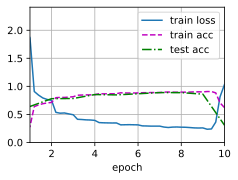

In [17]:

d2l.train_ch6(net, train_iter, test_iter, num_epochs, lr, d2l.try_gpu())

The fact that it is training so successfully should mean something. I need to implement the d2l functions in my vanilla implementation.